In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
# 인코딩될 표현(representation)의 크기
encoding_dim = 32  # 32 floats -> 24.5의 압축으로 입력이 784 float라고 가정

# 입력 플레이스홀더
input_img = Input(shape=(784,))
# "encoded"는 입력의 인코딩된 표현
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded"는 입력의 손실있는 재구성 (lossy reconstruction)
decoded = Dense(784, activation='sigmoid')(encoded)

Using TensorFlow backend.


In [2]:
# 입력을 입력의 재구성으로 매핑할 모델
autoencoder = Model(input_img, decoded)

# 이 모델은 입력을 입력의 인코딩된 입력의 표현으로 매핑
encoder = Model(input_img, encoded)

# 인코딩된 입력을 위한 플레이스 홀더
encoded_input = Input(shape=(encoding_dim,))
# 오토인코더 모델의 마지막 레이어 얻기
decoder_layer = autoencoder.layers[-1]

In [3]:
# 디코더 모델 생성
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.3603 - val_loss: 0.2710
Epoch 2/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2636 - val_loss: 0.2529
Epoch 3/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2436 - val_loss: 0.2322
Epoch 4/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2244 - val_loss: 0.2140
Epoch 5/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2082 - val_loss: 0.2000
Epoch 6/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1964 - val_loss: 0.1901
Epoch 7/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1878 - val_loss: 0.1826
Epoch 8/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1810 - val_loss: 0.1765
Epoch 9/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1753 - val_loss: 0.1711
Epoc

In [6]:
# 숫자들을 인코딩 / 디코딩
# test set에서 숫자들을 가져왔다는 것을 유의
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


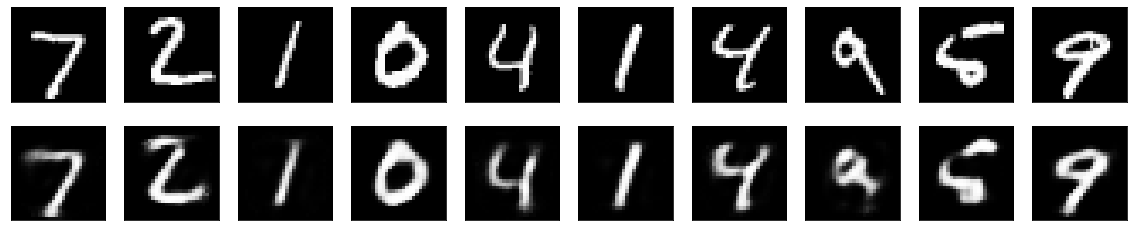

In [7]:
# Matplotlib 사용
n = 10  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
